In [1]:
import torch
import torchaudio
from torch import nn

# TORCHAUDIO

## Audio I/O

### Audio metadata
torchaudio.info() muestra información sobre un audio. Por ejemplo:
- Frecuencia de sampleo
- Cantidad de canales
- Cantidad de muestras por canal
- Profundidad de bits

entre otros

In [2]:
import os
import tempfile
import matplotlib.pyplot as plt
from IPython.display import Audio
from torchaudio.utils import download_asset

SAMPLE_GSM = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.gsm")
SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
SAMPLE_WAV_8000 = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042-8000hz.wav")


def _hide_seek(obj):
    class _wrapper:
        def __init__(self, obj):
            self.obj = obj

        def read(self, n):
            return self.obj.read(n)

    return _wrapper(obj)

In [3]:
metadata = torchaudio.info(SAMPLE_WAV)
print(metadata)

AudioMetaData(sample_rate=16000, num_frames=54400, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [4]:
metadata = torchaudio.info(SAMPLE_GSM)
print(metadata)

AudioMetaData(sample_rate=8000, num_frames=39680, num_channels=1, bits_per_sample=0, encoding=GSM)


También se puede usar torchaudio.info() con archivos pero solo lee la información del principio del archivo.

### Load Audio Data

Para cargar un audio se usa torchaudio.load(), esta función acepta un objeto similar a un Path o un archivo como entrada. El valor devuelto es una tupla de forma de onda (Tensor) y frecuencia de muestreo (int). De forma predeterminada, el tensor resultante tiene dtype=torch.float32 y su rango de valores es [-1.0, 1.0].

In [5]:
waveform, sample_rate = torchaudio.load(SAMPLE_WAV)

print(waveform.shape)

torch.Size([1, 54400])


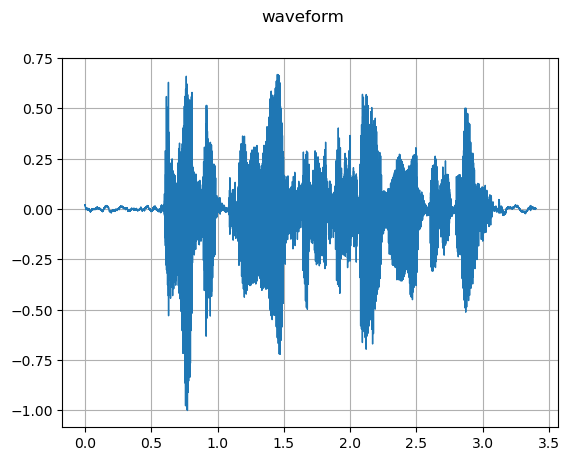

In [6]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")

plot_waveform(waveform, sample_rate)

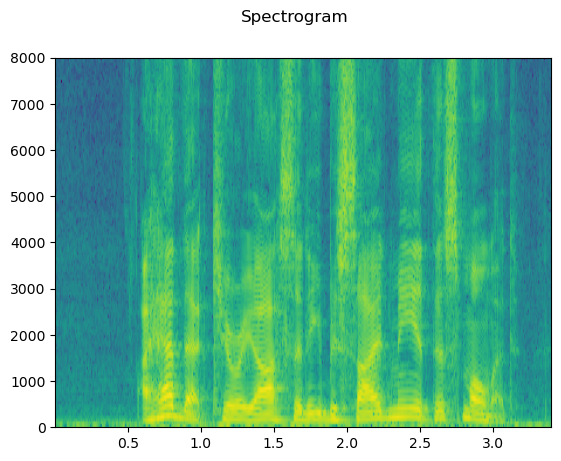

In [7]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    
plot_specgram(waveform, sample_rate)

In [8]:
Audio(waveform.numpy()[0], rate=sample_rate)

Se puede reproducir tanto un numpy array como un torch.Tensor

### Slicing

Proporcionar los argumentos num_frames y frame_offset restringe la decodificación al segmento correspondiente de la entrada:

In [9]:
frame_offset, num_frames = 16000, 16000  # Fetch and decode the 1 - 2 seconds

waveform_1 = waveform[:, frame_offset : frame_offset + num_frames]
print(waveform_1)

Audio(waveform_1, rate=sample_rate)

tensor([[ 0.0248,  0.0249,  0.0240,  ...,  0.0344, -0.0636, -0.0125]])


### Save Audio

Usamos torchaudio.save(). Esta función acepta un objeto similar a un Path o un archivo como entrada.

In [11]:
from pathlib import Path

MODEL_PATH = Path("audios data")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

path = f"{MODEL_PATH}/save_example_default.wav"
torchaudio.save(path, waveform, sample_rate)